In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from tensorflow import keras

In [5]:
from keras.layers import Input, Lambda, Dense, Flatten

In [6]:
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [7]:
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [8]:
# vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False) 
# include_top = false , to exclude vgg16 top dense layers 

In [9]:
# for layer in vgg.layers:
#     layer.trainable = False # feature extraction approach

In [10]:
# folders = glob('Datasets/train/*')
# x = Flatten()(vgg.output)

In [11]:
# prediction = Dense(len(folders), activation='softmax')(x)  #custom output layer 
# # create a model object
# model = Model(inputs=vgg.input, outputs=prediction)
# # view the structure of the model
# model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │        50,178 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,764,866 (56.32 MB)

 Trainable params: 50,178 (196.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adamax

In [15]:
channels = 3
class_count = len(list(training_set.class_indices.keys())) # to define number of classes in dense layer
img_shape = (IMAGE_SIZE[0], IMAGE_SIZE[1], channels)

model = Sequential([
    Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu", input_shape=img_shape ),
    BatchNormalization(),
    Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    BatchNormalization(),
    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    BatchNormalization(),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    BatchNormalization(),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    BatchNormalization(),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    BatchNormalization(),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dropout(0.2),
    
    Dense(256,activation = "relu"),
    Dropout(0.2),
    Dense(64,activation = "relu"),
    Dropout(0.2),
    Dense(class_count, activation = "softmax")
])


# Print model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 224, 224, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 224, 224, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 112, 112, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 112, 112, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 56, 56, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 56, 56, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 56, 56, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 28, 28, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 28, 28, 512)    │         2,04

 Total params: 33,352,962 (127.23 MB)

 Trainable params: 33,347,586 (127.21 MB)

 Non-trainable params: 5,376 (21.00 KB)

In [17]:
model.compile(Adamax(learning_rate= 0.001), 
              loss= 'categorical_crossentropy', 
              metrics= ['accuracy']
              )

In [12]:
# model.compile(
#   loss='categorical_crossentropy',
#   optimizer='adam',
#   metrics=['accuracy']
# )

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [10]:
# test_datagen = ImageDataGenerator(rescale = 1./255)
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Prepare the validation data
val_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 10,
                                                 class_mode = 'categorical')

val_set = val_datagen.flow_from_directory('Datasets/val',
                                          target_size = (224, 224),
                                          batch_size = 10,
                                          class_mode = 'categorical')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [18]:
epochs=8
r=model.fit(training_set,
        epochs=epochs ,
        validation_data=val_set ,
        verbose=1)

Epoch 1/8
522/522 ━━━━━━━━━━━━━━━━━━━━ 7240s 14s/step - accuracy: 0.7932 - loss: 4.1026 - val_accuracy: 0.5000 - val_loss: 2.6107
Epoch 2/8
522/522 ━━━━━━━━━━━━━━━━━━━━ 8330s 16s/step - accuracy: 0.8754 - loss: 0.5694 - val_accuracy: 0.6875 - val_loss: 1.0882
Epoch 3/8
522/522 ━━━━━━━━━━━━━━━━━━━━ 7853s 15s/step - accuracy: 0.8830 - loss: 0.3700 - val_accuracy: 0.5000 - val_loss: 20.6063
Epoch 4/8
522/522 ━━━━━━━━━━━━━━━━━━━━ 7064s 14s/step - accuracy: 0.9042 - loss: 0.2776 - val_accuracy: 0.7500 - val_loss: 0.3148
Epoch 5/8
429/522 ━━━━━━━━━━━━━━━━━━━━ 20:54 13s/step - accuracy: 0.9112 - loss: 0.2505

KeyboardInterrupt: 

In [15]:
  # Train the model with validation
# r = model.fit(
#   training_set,
#   validation_data=val_set,
#   epochs=10,
#   steps_per_epoch=len(training_set), # the number of batches to draw from the dataset before considering one epoch complete.
#   validation_steps=len(val_set)
# )


Epoch 1/10
522/522 ━━━━━━━━━━━━━━━━━━━━ 2073s 4s/step - accuracy: 0.8900 - loss: 0.3193 - val_accuracy: 0.9375 - val_loss: 0.1794
Epoch 2/10
522/522 ━━━━━━━━━━━━━━━━━━━━ 0s 131us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/10
522/522 ━━━━━━━━━━━━━━━━━━━━ 1878s 4s/step - accuracy: 0.9499 - loss: 0.1443 - val_accuracy: 0.8750 - val_loss: 0.2631
Epoch 4/10
522/522 ━━━━━━━━━━━━━━━━━━━━ 0s 57us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/10
522/522 ━━━━━━━━━━━━━━━━━━━━ 2032s 4s/step - accuracy: 0.9625 - loss: 0.1176 - val_accuracy: 0.6875 - val_loss: 0.9286
Epoch 6/10
522/522 ━━━━━━━━━━━━━━━━━━━━ 0s 48us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/10
522/522 ━━━━━━━━━━━━━━━━━━━━ 1960s 4s/step - accuracy: 0.9540 - loss: 0.1637 - val_accuracy: 0.8750 - val_loss: 0.3975
Epoch 8/10
522/522 ━━━━━━━━━━━━━━━━━━━━ 0s 4

 Plotting the training and validation loss curves

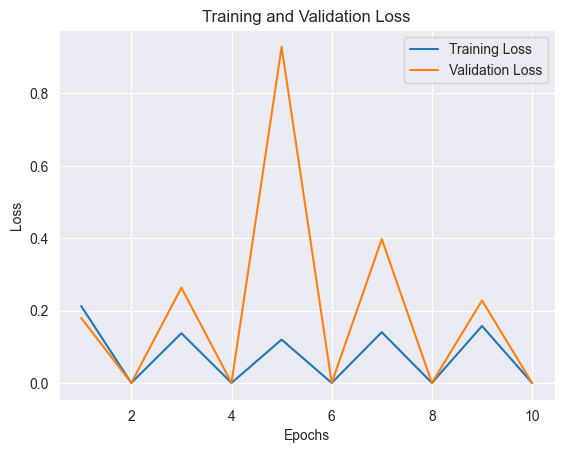

In [16]:
train_loss = r.history['loss']
val_loss = r.history['val_loss']

epochs = range(1, len(train_loss) + 1)

# Plot the loss graph
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
import tensorflow as tf
from keras.models import load_model

# Save the model
model.save('chest_xray.h5')

In [18]:
from keras.models import load_model

In [19]:
from keras.preprocessing import image

In [20]:
from keras.applications.vgg16 import preprocess_input

In [21]:
import numpy as np

In [22]:
model=load_model('chest_xray.h5')

In [23]:
# Prepare the test data #Preprocessing
test_datagen = ImageDataGenerator(rescale = 1./255) #normalization

#generates batches of data from images in a directory
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 10,
                                            class_mode = 'categorical',
                                            shuffle=False,
                                            )



Found 624 images belonging to 2 classes.


In [24]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_set, steps=len(test_set))

print("Test Accuracy: ", test_acc)
print("Test Loss: ", test_loss)


63/63 ━━━━━━━━━━━━━━━━━━━━ 198s 3s/step - accuracy: 0.9010 - loss: 0.5780
Test Accuracy:  0.9134615659713745
Test Loss:  0.4416847825050354


TESTING ON A SINGLE IMAGE

In [25]:
from keras.preprocessing import image

img_path = r"C:\Users\rkt2k\PycharmProjects\pythonProject\MINI PROJECT\Datasets\val\PNEUMONIA\person1946_bacteria_4875.jpeg"
img = image.load_img(img_path, target_size=(224,224))

In [26]:
x=image.img_to_array(img)

In [27]:
x=np.expand_dims(x, axis=0)

In [28]:
img_data=preprocess_input(x)

In [29]:
classes=model.predict(img_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 825ms/step


In [30]:
#0 --> Normal class , 1-->Pneumonia class so result[0][0] gives the probability of it belonging to Normal class
#int(classes[0][0]) converts it to 0 if probability<0.5 else to 1
result=int(classes[0][0])

In [31]:
if result==0:
    print("Person is Affected By PNEUMONIA")
else:
    print("Result is Normal")

Person is Affected By PNEUMONIA


In [32]:
predictions = model.predict(test_set)

63/63 ━━━━━━━━━━━━━━━━━━━━ 202s 3s/step


In [33]:
predictions

array([[9.9999022e-01, 9.8044893e-06],
       [9.9982065e-01, 1.7935330e-04],
       [9.9998319e-01, 1.6859642e-05],
       ...,
       [4.7314578e-07, 9.9999952e-01],
       [3.0362785e-06, 9.9999702e-01],
       [2.2599224e-02, 9.7740084e-01]], dtype=float32)

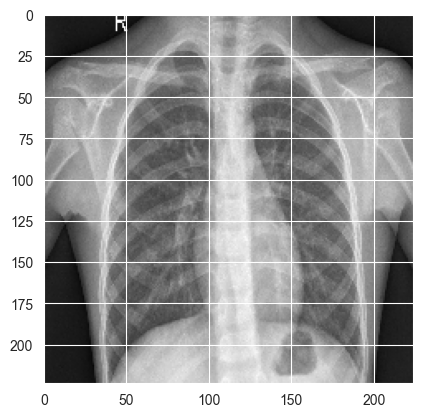

The probability of pneumonia is :  0.0009804489309317432


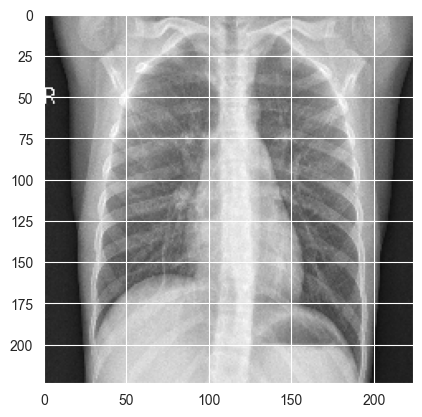

The probability of pneumonia is :  0.01793533010641113


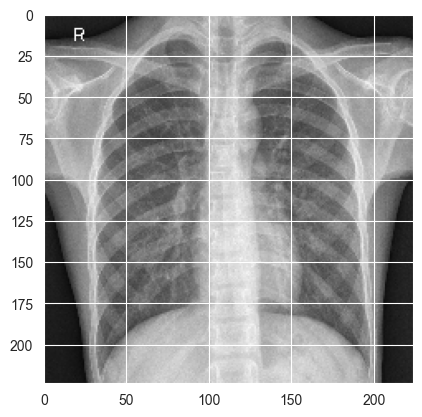

The probability of pneumonia is :  0.001685964161879383


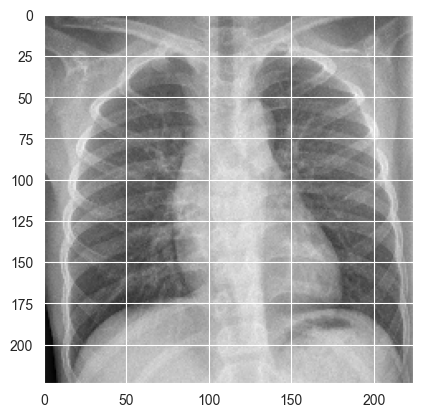

The probability of pneumonia is :  0.003750198447960429


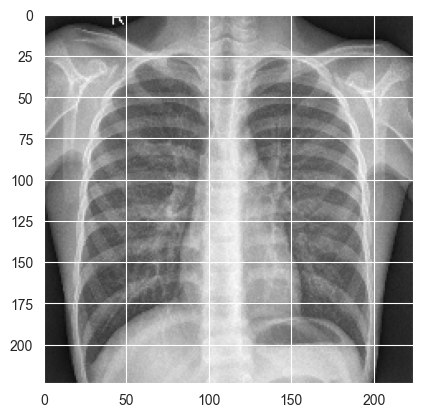

The probability of pneumonia is :  6.228286792975268e-05


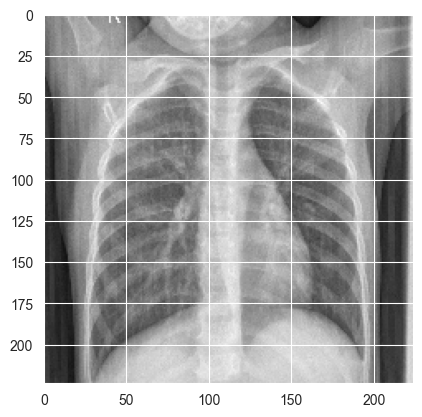

The probability of pneumonia is :  0.03213403979316354


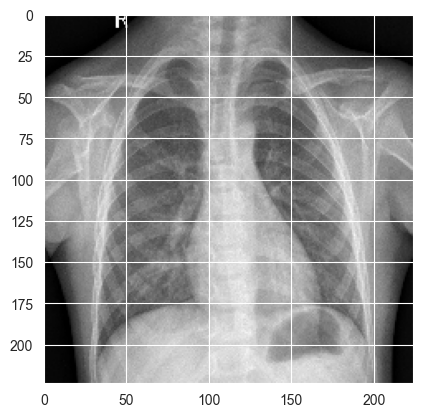

The probability of pneumonia is :  0.006982407649047673


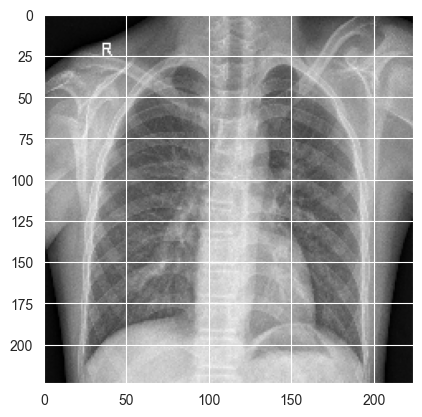

The probability of pneumonia is :  0.00022930460090719862


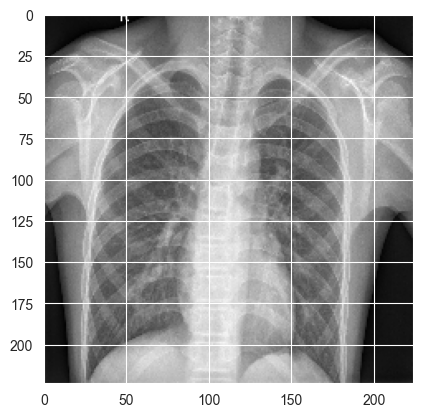

The probability of pneumonia is :  0.0011651372005871963


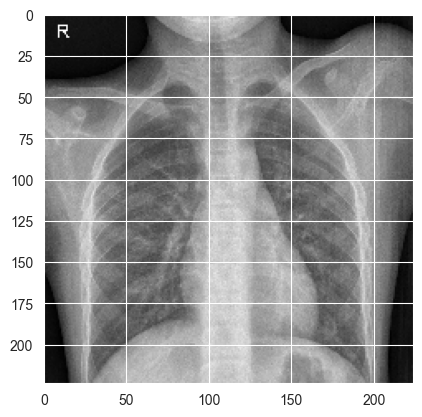

The probability of pneumonia is :  0.0007782805369060952


In [34]:
x = next(test_set) #loads a batch from text-set #x is a tuple of the form (image,label)
for i in range(0,1):
    image = x[i] #x[1] contains corresponding labels for the image 
    for j in range (0,10):
        plt.imshow(image[j])
        plt.show()
        print("The probability of pneumonia is : ", predictions[j][1]*100)

In [35]:
from sklearn.metrics import classification_report

# Extracting the predicted labels
predicted_labels = np.argmax(predictions, axis=1)
# Getting the true labels
true_labels = test_set.classes


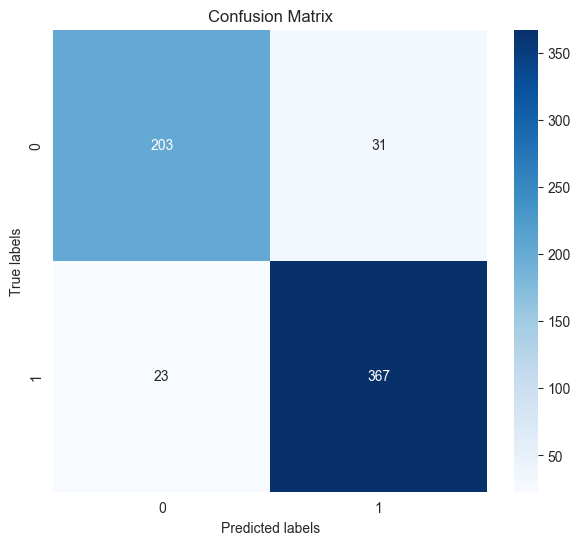

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       234
           1       0.92      0.94      0.93       390

    accuracy                           0.91       624
   macro avg       0.91      0.90      0.91       624
weighted avg       0.91      0.91      0.91       624


In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g', cmap='Blues', square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()
    
    if report:
        print('Classification Report:')
        print(classification_report(y_true, y_pred))
        
Y_pred = predictions
y_pred = np.argmax(Y_pred, axis=1)
# Example usage
y_test = test_set.classes
print_confusion_matrix(y_test, y_pred)

# print_heatmap_metrics(y_test, y_pred)
